# ColabでJuliaを使うためのノートブック

* 黒木玄
* 2025-05-13
$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
$

このノートは[Google Colab](https://colab.research.google.com/)で使用できるように書いたつもりである.

__2025-05-13:__ 以下のセルをGoogle Colabで実行すると～分程度かかるようである.

In [1]:
# Google Colabと自分のパソコンの両方で使えるようにするための工夫

import Pkg

"""すでにPkg.add済みのパッケージのリスト"""
packages_added = [info.name for (uuid, info) in Pkg.dependencies() if info.is_direct_dep]

"""必要ならPkg.assした後にusingしてくれる関数"""
function _using(pkg::AbstractString)
    if pkg in packages_added
        println("# $(pkg).jl is already added."); flush(stdout)
    else
        println("# $(pkg).jl is not added yet, so let's add it."); flush(stdout)
        Pkg.add(pkg)
    end    
    println("> using $(pkg)"); flush(stdout)
    @eval using $(Symbol(pkg))
end

"""必要ならPkg.addした後にusingしてくれるマクロ"""
macro _using(pkg) :(_using($(string(pkg)))) end

# 以下は黒木玄がよく使っているパッケージ達
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using LinearAlgebra
using Printf
using Random
Random.seed!(4649373)
@_using BenchmarkTools
@_using Distributions
@_using Optim
@_using QuadGK
@_using RDatasets
@_using Roots
@_using StatsBase
@_using StatsFuns
@_using SpecialFunctions
@_using StatsPlots
default(fmt = :png)
@_using SymPy

# BenchmarkTools.jl is already added.
> using BenchmarkTools
# Distributions.jl is already added.
> using Distributions
# Optim.jl is already added.
> using Optim
# QuadGK.jl is already added.
> using QuadGK
# RDatasets.jl is already added.
> using RDatasets
# Roots.jl is already added.
> using Roots
# StatsBase.jl is already added.
> using StatsBase
# StatsFuns.jl is already added.
> using StatsFuns
# SpecialFunctions.jl is already added.
> using SpecialFunctions
# StatsPlots.jl is already added.
> using StatsPlots
# SymPy.jl is already added.
> using SymPy


## ランダムウォーク

## 大数の法則

## 中心極限定理の素朴な確認の仕方

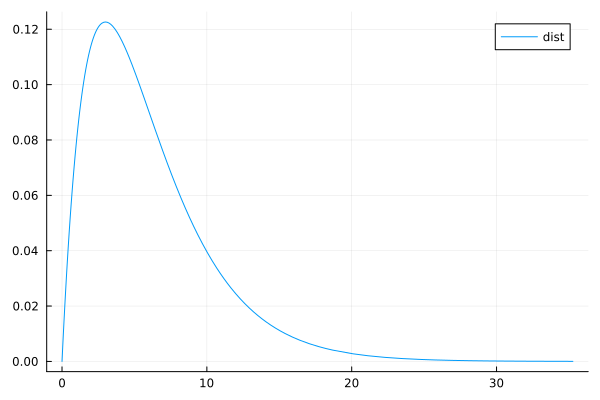

In [2]:
dist = Gamma(2, 3)
plot(dist; label="dist")

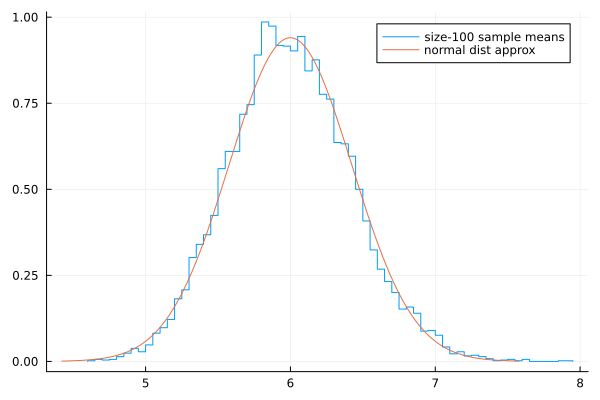

In [3]:
n = 100 # sample size
niters = 10^4 # number of iterations
Xtmp = rand(dist, n)
samplemeans = [mean(rand!(dist, Xtmp)) for n in 1:niters] # niters個の標本平均を計算
normalapprox = Normal(mean(dist), std(dist)/sqrt(n)) # 中心極限定理による正規分布近似

stephist(samplemeans; norm=true, label="size-$n sample means")
plot!(normalapprox; label="normal dist approx")

## 以下は自由に使って下さい